In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#read origin img 
image = cv2.imread('lena.bmp',0)
rows,cols = image.shape
img = np.asarray(image)
print(rows,cols)

512 512


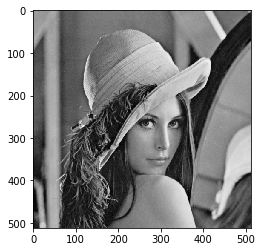

In [3]:
X = img
fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest',cmap = 'gray')
numrows, numcols = X.shape
plt.show()

In [4]:
n_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)

def mask(img, i, j, kernel):
    k_r, k_c = kernel.shape
    tmp = 0
    for a in range(k_r):
        for b in range(k_c):
            tmp += img[i+a][j+b] * kernel[a][b]
    return tmp

### Robert's Operator  

In [5]:
r_1 = np.array([[-1, 0],
                [0, 1]])

r_2 = np.array([[0, -1],
                [1, 0]])

In [6]:
Rob_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        val = math.sqrt(mask(n_img, i,j, r_1)**2 + mask(n_img, i,j, r_2)**2)
        if val > 30:
            Rob_img[i][j] = 0
        else: 
            Rob_img[i][j] = 255

In [7]:
#X = Rob_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()
cv2.imwrite('Robert_30.png',Rob_img)

True

### Prewitt's Edge Detector

In [8]:
p_1 = np.array([[-1, -1, -1],
                [ 0,  0,  0],
                [ 1,  1,  1]])

p_2 = np.array([[-1,  0,  1],
                [-1,  0,  1],
                [-1,  0,  1]])

In [9]:
Pre_val = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        Pre_val[i][j] = math.sqrt(mask(n_img, i,j, p_1)**2 + mask(n_img, i,j, p_2)**2)

In [10]:
Pre_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        if Pre_val[i][j] > 24: #threshold = 85 will be better
            Pre_img[i][j] = 0
        else: 
            Pre_img[i][j] = 255
cv2.imwrite('Prewitt_24.png',Pre_img)

for i in range(512):
    for j in range(512):
        if Pre_val[i][j] > 85: #threshold = 85 will be better
            Pre_img[i][j] = 0
        else: 
            Pre_img[i][j] = 255
cv2.imwrite('Prewitt_85.png',Pre_img)

True

In [11]:
#X = Pre_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()

### Sobel's Edge Detector

In [12]:
s_1 = np.array([[-1, -2, -1],
                [ 0,  0,  0],
                [ 1,  2,  1]])

s_2 = np.array([[-1,  0,  1],
                [-2,  0,  2],
                [-1,  0,  1]])

In [13]:
Sob_val = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        Sob_val[i][j] = math.sqrt(mask(n_img, i,j, s_1)**2 + mask(n_img, i,j, s_2)**2)
       

In [14]:
Sob_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        if Sob_val[i][j] > 38:#threshold = 120 will be better
            Sob_img[i][j] = 0
        else: 
            Sob_img[i][j] = 255
cv2.imwrite('Sobel_38.png',Sob_img)

for i in range(512):
    for j in range(512):
        if Sob_val[i][j] > 120:#threshold = 120 will be better
            Sob_img[i][j] = 0
        else: 
            Sob_img[i][j] = 255
cv2.imwrite('Sobel_120.png',Sob_img)

True

In [15]:
#X = Sob_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()

### Frei and Chen's Gradient Operator

In [33]:
f_1 = np.array([[-1, -1*math.sqrt(2), -1],
                [ 0,  0,  0],
                [ 1,  math.sqrt(2),  1]])

f_2 = np.array([[-1,  0,  1],
                [-1*math.sqrt(2),  0,  math.sqrt(2)],
                [-1,  0,  1]])

In [34]:
Fri_val = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        Fri_val[i][j] = math.sqrt(mask(n_img, i,j, f_1)**2 + mask(n_img, i,j, f_2)**2)
        

In [35]:
Fri_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        if Fri_val[i][j] > 30:#threshold = 120 will be better
            Fri_img[i][j] = 0
        else: 
            Fri_img[i][j] = 255    
cv2.imwrite('Frei_and_Chen_30.png',Fri_img)

for i in range(512):
    for j in range(512):
        if Fri_val[i][j] > 120:#threshold = 120 will be better
            Fri_img[i][j] = 0
        else: 
            Fri_img[i][j] = 255    
cv2.imwrite('Frei_and_Chen_120.png',Fri_img)

True

In [19]:
#X = Fri_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()

### Kirsch's Compass Operator

In [20]:
k_0 = np.array([[-3, -3,  5], [-3,  0,  5], [-3, -3,  5]])
k_1 = np.array([[-3,  5,  5], [-3,  0,  5], [-3, -3, -3]])
k_2 = np.array([[ 5,  5,  5], [-3,  0, -3], [-3, -3, -3]])
k_3 = np.array([[ 5,  5, -3], [ 5,  0, -3], [-3, -3, -3]])
k_4 = np.array([[ 5, -3, -3], [ 5,  0, -3], [ 5, -3, -3]])
k_5 = np.array([[-3, -3, -3], [ 5,  0, -3], [ 5,  5, -3]])
k_6 = np.array([[-3, -3, -3], [-3,  0, -3], [ 5,  5,  5]])
k_7 = np.array([[-3, -3, -3], [-3,  0,  5], [-3,  5,  5]])
ks = [k_0, k_1, k_2, k_3, k_4, k_5, k_6, k_7]

In [21]:
Kir_val = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        for k in range(8):
            tmp = mask(n_img, i,j, ks[k])
            if Kir_val[i][j] < tmp:
                Kir_val[i][j] = tmp

In [22]:
Kir_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        if Kir_val[i][j] > 135:#threshold = 435 will be better
            Kir_img[i][j] = 0
        else: 
            Kir_img[i][j] = 255
cv2.imwrite('Kirsch_135.png',Kir_img)           

for i in range(512):
    for j in range(512):
        if Kir_val[i][j] > 435:#threshold = 435 will be better
            Kir_img[i][j] = 0
        else: 
            Kir_img[i][j] = 255
cv2.imwrite('Kirsch_435.png',Kir_img)     

True

In [23]:
#X = Kir_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()

### Robinson's Compass Operator

In [24]:
R_0 = np.array([[-1,  0,  1], [-2,  0,  2], [-1,  0,  1]])
R_1 = np.array([[ 0,  1,  2], [-1,  0,  1], [-2, -1,  0]])
R_2 = np.array([[ 1,  2,  1], [ 0,  0,  0], [-1, -2, -1]])
R_3 = np.array([[ 2,  1,  0], [ 1,  0, -1], [ 0, -1, -2]])
R_4 = np.array([[ 1,  0, -1], [ 2,  0, -2], [ 1,  0, -1]])
R_5 = np.array([[ 0, -1, -2], [ 1,  0, -1], [ 2,  1,  0]])
R_6 = np.array([[-1, -2, -1], [ 0,  0,  0], [ 1,  2,  1]])
R_7 = np.array([[-2, -1,  0], [-1,  0,  1], [ 0,  1,  2]])
Rs = [R_0, R_1, R_2, R_3, R_4, R_5, R_6, R_7]

In [25]:
Robi_val = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        for k in range(8):
            tmp = mask(n_img, i,j, Rs[k])
            if Robi_val[i][j] < tmp:
                Robi_val[i][j] = tmp

In [26]:
Robi_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        if Robi_val[i][j] > 43:#threshold = 115 will be better
            Robi_img[i][j] = 0
        else: 
            Robi_img[i][j] = 255  
cv2.imwrite('Robinson_43.png',Robi_img)  

for i in range(512):
    for j in range(512):
        if Robi_val[i][j] > 115:#threshold = 115 will be better
            Robi_img[i][j] = 0
        else: 
            Robi_img[i][j] = 255  
cv2.imwrite('Robinson_115.png',Robi_img)    

True

In [27]:
#X = Robi_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()

### Nevatia-Babu 5x5 Operator

In [28]:
N_0 = np.array([[ 100, 100, 100, 100, 100],
                [ 100, 100, 100, 100, 100],
                [   0,   0,   0,   0,   0],
                [-100,-100,-100,-100,-100],
                [-100,-100,-100,-100,-100]])

N_3 = np.array([[ 100, 100, 100, 100, 100],
                [ 100, 100, 100,  78, -32],
                [ 100,  92,   0, -92,-100],
                [  32, -78,-100,-100,-100],
                [-100,-100,-100,-100,-100]])

N_6 = np.array([[ 100, 100, 100,  32,-100],
                [ 100, 100,  92, -78,-100],
                [ 100, 100,   0,-100,-100],
                [ 100,  78, -92,-100,-100],
                [ 100, -32,-100,-100,-100]])

N_27 = np.array([[-100,-100,   0, 100, 100],
                 [-100,-100,   0, 100, 100],
                 [-100,-100,   0, 100, 100],
                 [-100,-100,   0, 100, 100],
                 [-100,-100,   0, 100, 100]])

N_30 = np.array([[-100,  32, 100, 100, 100],
                 [-100, -78,  92, 100, 100],
                 [-100,-100,   0, 100, 100],
                 [-100,-100, -92,  78, 100],
                 [-100,-100,-100, -32, 100]])

N_33 = np.array([[ 100, 100, 100, 100, 100],
                 [ -32,  78, 100, 100, 100],
                 [-100, -92,   0,  92, 100],
                 [-100,-100,-100, -78,  32],
                 [-100,-100,-100,-100,-100]])
N_lst = [N_0, N_3, N_6, N_27, N_30, N_33]

In [29]:
def mask(img, i, j, kernel):
    k_r, k_c = kernel.shape
    tmp = 0
    for a in range(k_r):
        for b in range(k_c):
            tmp += img[i+a][j+b] * kernel[a][b]
    return tmp

In [30]:
n_img = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
Nev_val = np.full((512,512),0)
for i in range(512):
    for j in range(512):
        for k in range(6):
            tmp = mask(n_img, i,j, N_lst[k])
            if Nev_val[i][j] < tmp:
                Nev_val[i][j] = tmp
 

In [31]:
Nev_img = np.full((512,512),0)
for i in range(512):
    for j in range(512):  
        if Nev_val[i][j] > 12500 :#threshold = 32500 will be better
            Nev_img[i][j] = 0
        else: 
            Nev_img[i][j] = 255
cv2.imwrite('Nevatia-Babu_12500.png',Nev_img)  


for i in range(512):
    for j in range(512):  
        if Nev_val[i][j] > 32500 :#threshold = 32500 will be better
            Nev_img[i][j] = 0
        else: 
            Nev_img[i][j] = 255
cv2.imwrite('Nevatia-Babu_32500.png',Nev_img) 


True

In [32]:
#X = Nev_img
#fig, ax = plt.subplots(figsize=(10,20))
#ax.imshow(X, interpolation='nearest',cmap = 'gray')
#numrows, numcols = X.shape
#plt.show()